In [17]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor



In [2]:
df=pd.read_csv("C:/Users/Don Augwin/OneDrive/Datasets/TATASTEEL.NS.csv")

In [3]:
# Prepare data
data = df[['Date', 'Close']]

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set 'Date' column as index
data.set_index('Date', inplace=True)

C:\Users\DONAUG~1\AppData\Local\Temp/ipykernel_50316/3803081276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


In [4]:
# Shift the 'Close' price to create lag features
for i in range(1, 6):
    data[f'lag_{i}'] = data['Close'].shift(i)

# Drop NaN values due to lag
data.dropna(inplace=True)

C:\Users\DONAUG~1\AppData\Local\Temp/ipykernel_50316/595656326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'lag_{i}'] = data['Close'].shift(i)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [5]:
# Splitting data into features and target variable
X = data.drop('Close', axis=1)
y = data['Close']

# Splitting data into train and test sets
X_train, X_test = X[:-90], X[-90:]
y_train, y_test = y[:-90], y[-90:]

In [6]:
# Initializing models
ada = AdaBoostRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()


In [7]:
# Stack models
estimators = [('AdaBoost', ada), ('XGBoost', xgb), ('LightGBM', lgbm)]
stack = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())


In [8]:
# Fitting models
ada.fit(X_train, y_train)
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
stack.fit(X_train, y_train)


StackingRegressor(estimators=[('AdaBoost', AdaBoostRegressor()),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            int...
                                            learning_rate=None, max_bin=None,
      

In [9]:
# Predictions
ada_pred = ada.predict(X_test)
xgb_pred = xgb.predict(X_test)
lgbm_pred = lgbm.predict(X_test)
stack_pred = stack.predict(X_test)

In [10]:
# Evaluate models
models = {'AdaBoost': ada_pred, 'XGBoost': xgb_pred, 'LightGBM': lgbm_pred, 'Stacked': stack_pred}
for name, pred in models.items():
    mse = mean_squared_error(y_test, pred)
    print(f"{name} - MSE: {mse:.2f}")

AdaBoost - MSE: 29.47
XGBoost - MSE: 4.50
LightGBM - MSE: 3.54
Stacked - MSE: 139.23


In [12]:
# Evaluate models using R2 score
models = {'AdaBoost': ada_pred, 'XGBoost': xgb_pred, 'LightGBM': lgbm_pred, 'Stacked': stack_pred}
for name, pred in models.items():
    r2 = r2_score(y_test, pred)
    print(f"{name} - R2 Score: {r2:.2f}")

AdaBoost - R2 Score: 0.04
XGBoost - R2 Score: 0.85
LightGBM - R2 Score: 0.88
Stacked - R2 Score: -3.52


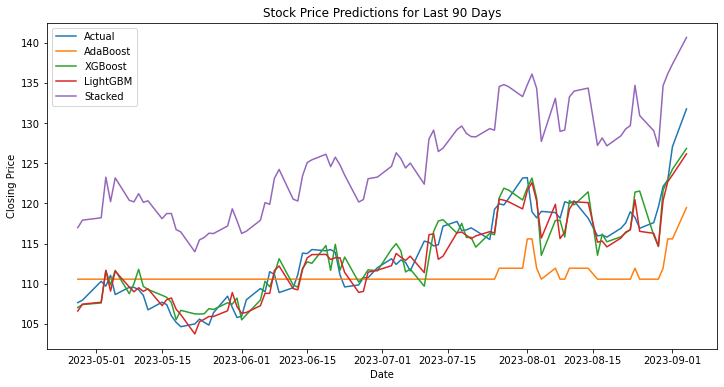

In [13]:
# Plotting actual vs predicted for the last 90 days
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
for name, pred in models.items():
    plt.plot(y_test.index, pred, label=name)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Predictions for Last 90 Days')
plt.legend()
plt.show()

In [14]:
#Ada boost failed
#XG Boost and LightGBM performed really well, but not upto the level of SVM

In [18]:
# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree - R2 Score:", r2_score(y_test, dt_pred))

# Decision Tree with Bagging
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
print("Decision Tree with Bagging - R2 Score:", r2_score(y_test, bagging_pred))

# CART (Classification and Regression Trees)
cart = DecisionTreeRegressor(criterion='mse')
cart.fit(X_train, y_train)
cart_pred = cart.predict(X_test)
print("CART - R2 Score:", r2_score(y_test, cart_pred))

Decision Tree - R2 Score: 0.576279579196238
Decision Tree with Bagging - R2 Score: 0.8415217904506401
CART - R2 Score: 0.663230462307687


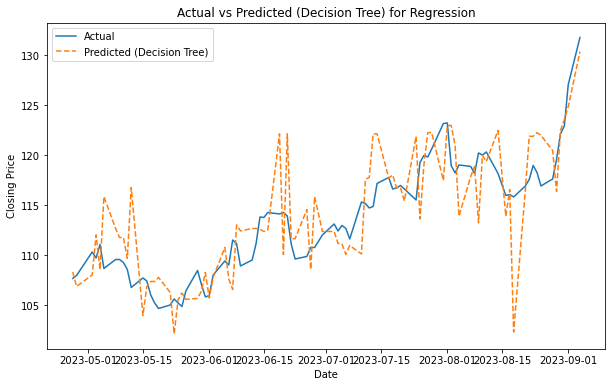

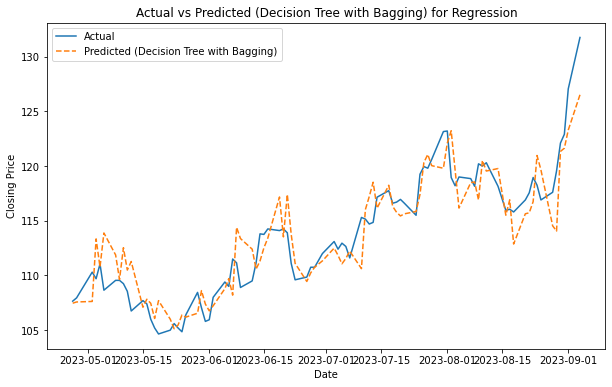

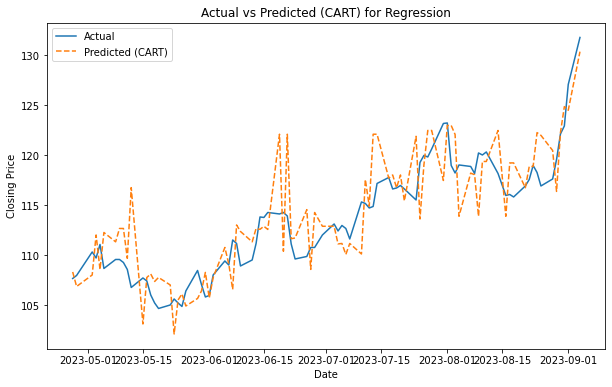

In [19]:
# Plotting actual vs predicted for Decision Tree
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, dt_pred, label='Predicted (Decision Tree)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted (Decision Tree) for Regression')
plt.legend()
plt.show()

# Plotting actual vs predicted for Decision Tree with Bagging
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, bagging_pred, label='Predicted (Decision Tree with Bagging)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted (Decision Tree with Bagging) for Regression')
plt.legend()
plt.show()

# Plotting actual vs predicted for CART (Decision Tree)
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, cart_pred, label='Predicted (CART)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted (CART) for Regression')
plt.legend()
plt.show()

In [20]:
#Bagging and Boosting are behaving in similar pattern for the problem.